<a href="https://colab.research.google.com/github/Ghost1886/Diplom/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [2]:
# satisfaction_level - Уровень удовлетворенности работой
# Last_evaluation - Время с момента последней оценки в годах
# number_projects - Количество проектов, выполненных за время работы
# average_monthly_hours - Среднее количество часов на рабочем месте в месяц
# time_spend_company - Стаж работы в компании в годах
# work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
# left - уволился ли сотрудник
# promotion_last_5years - повышался ли сотрудник за последние пять лет
# department - отдел в котором работает сотрудник
# salary - относительный уровень зарплаты

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [4]:
# 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
# Проверим датафрейм на наличие дубликатов. (Веротяность того, что найдутся люди, у которых полностью совпадают ответы очень низкая)

len(df)- len(df.drop_duplicates ())

3008

In [5]:
# Убирем дубликаты.
df_new = df.drop_duplicates().reset_index(drop = True)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df_new.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.00,11991.00,11991.00,11991.00,11991.00,11991.00,11991.00,11991.00
mean,0.63,0.72,3.80,200.47,3.36,0.15,0.17,0.02
std,0.24,0.17,1.16,48.73,1.33,0.36,0.37,0.13
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.48,0.57,3.00,157.00,3.00,0.00,0.00,0.00
50%,0.66,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.86,5.00,243.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [7]:
# 3. Рассчитайте и визуализировать корреляционную матрицу для
# количественных переменных.
# Определите две самые скоррелированные и две наименее
# скоррелированные переменные

# 3.1 Рассчет
df_new.iloc[:,:5].corr().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000,0.095,-0.133,-0.006,-0.153
last_evaluation,0.095,1.000,0.270,0.265,0.097
number_project,-0.133,0.270,1.000,0.332,0.189
average_montly_hours,-0.006,0.265,0.332,1.000,0.103
time_spend_company,-0.153,0.097,0.189,0.103,1.000


<Axes: >

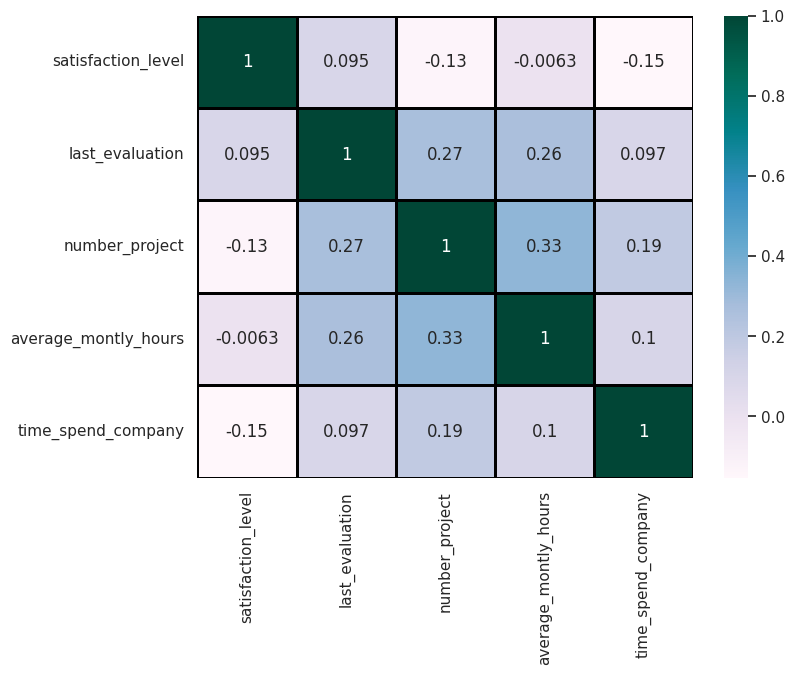

In [8]:
# 3.2 Визуализация
df_cor = df_new[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

sns.set(rc = {'figure.figsize':(8, 6)})
sns.heatmap(df_cor.corr(), annot = True, fmt='.2g', cmap= 'PuBuGn', linewidths=2, linecolor='black')

Вывод:
1. Наиболее скоррелированные величины: average_montly_hours и number_project.
2. Наименее скоррелированные величины: average_montly_hours и satisfaction_level.

In [9]:
# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.
df_new.groupby('department').size()

department
IT              976
RandD           694
accounting      621
hr              601
management      436
marketing       673
product_mng     686
sales          3239
support        1821
technical      2244
dtype: int64

In [10]:
# 5. Показать распределение сотрудников по зарплатам.
df_new.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [11]:
# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
df_new.pivot_table(index = 'department', columns = 'salary', aggfunc = 'size')

salary,high,low,medium
department,,,
IT,71,476,429
RandD,47,322,325
accounting,63,296,262
hr,38,296,267
management,128,139,169
marketing,62,310,301
product_mng,52,343,291
sales,237,1553,1449
support,126,867,828


In [12]:
# 7. Проверить гипотезу, что сотрудники с высоким окладом
# проводят на работе больше времени, чем сотрудники с низким
# окладом

print('Среднее количество рабочих часов сотрудников c низким окладом', df_new[df_new.salary == 'low']['average_montly_hours'].mean())
print('Среднее количество рабочих часов сотрудников с высоким окладом', df_new[df_new.salary == 'high']['average_montly_hours'].mean())

Среднее количество рабочих часов сотрудников c низким окладом 200.4391986062718
Среднее количество рабочих часов сотрудников с высоким окладом 200.06767676767677


Нулевая гипотеза - среднее время проведенное на работе одинаково для всех.

In [13]:
salary_low = df_new[df_new['salary'] == 'low']['average_montly_hours']
salary_high = df_new[df_new['salary'] == 'high']['average_montly_hours']

result = stats.ttest_ind(salary_low, salary_high, equal_var=False)

a = 0.05

if (result.pvalue < a):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


Вывод: Нулевая гипотеза не отвергается.

In [15]:
# 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

still_work = df_new[(df_new['left'] == 0)]
NOTwork =  df_new[(df_new['left'] == 1)]

indicators = pd.DataFrame()
rows = []

# 8.1 Доля сотрудников с повышением за последние 5 лет
rows.append(
    {
    'Показатель': 'Доля получивших повышение',
    'Уволившиеся': round(NOTwork.promotion_last_5years.value_counts(normalize = True)[1], 3),
    'Действующие': round(still_work.promotion_last_5years.value_counts(normalize = True)[1], 3)
    }
)


# 8.2 Средняя степень удовлетворенности
rows.append(
    {
    'Показатель': 'Средняя степень удовлетворенности',
    'Уволившиеся': round(NOTwork.satisfaction_level.mean(), 3),
    'Действующие': round(still_work.satisfaction_level.mean(), 3)
    }
)


# 8.3 Среднее количество проектов
rows.append(
    {
    'Показатель': 'Среднее количество проектов',
    'Уволившиеся': round(NOTwork.number_project.mean(), 3),
    'Действующие': round(still_work.number_project.mean(), 3)
    }
)

for row in rows:
    indicators = pd.concat([indicators, pd.DataFrame([row])])

indicators

,Показатель,Уволившиеся,Действующие
0,Доля получивших повышение,0.004,0.020
0,Средняя степень удовлетворенности,0.440,0.667
0,Среднее количество проектов,3.883,3.787


In [22]:
# 9. Разделить данные на тестовую и обучающую выборки

# 9.1 Построить модель LDA, предсказывающую уволился ли
# сотрудник на основе имеющихся факторов (кроме department и
# salary)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_new.iloc[:,[0,1,2,3,4,5,7]]
y = df_new['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [23]:
model_lda.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [24]:
# 9.2 Оценить качество модели на тестовой выборке
model_lda.score(X_test, y_test).round(2)

0.83

Вывод: Коэффициент детерминации = 0,83. Так как значение близко к 1, это свидетельствует о благоприятной модели.

In [25]:
accuracy_score(y_test, model_lda.predict(X_test)).round(2)

0.83

Вывод: Высокая точность модели.